#### Projeção gráfica com a solução da equação de Schrodinger mediante a um potencial harmônico

O conceito harmônico é frequentemente usado nas práticas de sistemas quânticos, portanto é um bom utilitário para estudos. Para a construção da solução devemos saber que o potêncial harmônico se da:

$$V(x) = \frac{m\cdot\omega^{2}\cdot x^{2}}{2}$$

transformando a equação, unidimensional, de Schrodinger:

$$H = \frac{-\hbar^{2}}{2m}\frac{d^{2}}{{dx}^{2}}+\frac{m\cdot\omega^{2}\cdot x^{2}}{2}$$

A partir do método analítico relatado por David Griffiths no livro base de Mecânica Quântica, podemos representar a solução com polinômios de Hermite $H_n(x)$ de forma que a função de onda pode ser representada como:

$$\psi_n(x)=(\frac{m\omega}{\pi\hbar})^{1/4}\cdot\frac{1}{\sqrt{2^n\cdot n!}} \cdot H_n(x)e^{-x^{2}/2}$$

e $H_n(x)$ pode ser tabelado como:

$$H_0=1$$
$$H_1=2x$$
$$H_2=4x^{2}-2$$
$$H_3=8x^{3}-12$$
$$.$$
$$.$$
$$.$$

Por fim, para que possamos entender todo processo que circunda a função de onda, devemos desenhá-la a partir da sua representação quadrática; sua densidade.

In [1]:
"Utilitários"

# A biblioteca de plotagem de gráficos do python
import numpy as np #Constantes e operações matemáticas básicas
import matplotlib.pyplot as plt #Plotagem 
from matplotlib import animation #Animação
import scipy as sp #Biblioteca para computação matemática, nesse caso usaremos a integral numérica, além dos polinômios de hermite
from scipy.integrate import trapz
from scipy.special import hermite

from math import factorial #!

#Linhas do gráfico
%matplotlib inline

In [2]:
# Definição do fator que multiplica o polinômio de Hermite, consideraremos que a massa da partícula é 1, 
# bem com a constante verdadeira de planck, o omega pertencente a equação vale pi para que a multiplicação
# inicial seja por 1, isso é possível porque o tamanho desses fatores são pequenos o suficiente para não 
# serem necessários para a análise.

def N(n):
    m = 1
    w = np.pi
    hbar = 1
    return ((m*w/(hbar*np.pi))**(1/4)*1./np.sqrt(np.sqrt(np.pi)*2**n*factorial(n)))

def psi(n, x):
    Hn=hermite(n)
    Px = N(n)*Hn(x)*np.exp(-0.5*x**2)
    return Px

A solução da equação de Schrödinger é dada pela combinação linear dos resultados de psi obtidos. Para este trabalho combinaremos a solução representada pelo primeiro polinômio de hermite juntamente com o segundo.

1.0


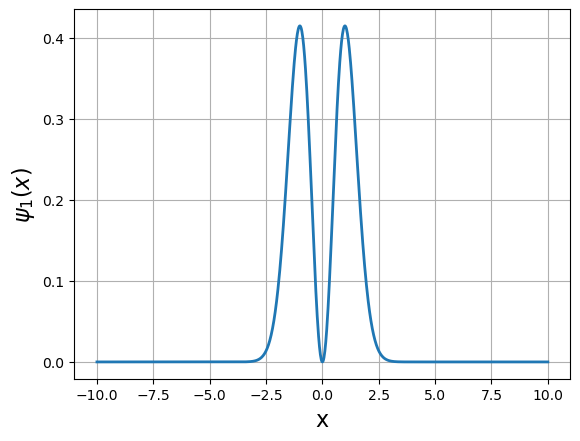

In [3]:
# Processo de integração numérica usando o método dos trapézios

x=np.linspace(-10,10,1000) # Espaçamento

psiquad=psi(1,x)**2

plt.plot(x,psiquad,lw=2) # Lineweight
    
plt.grid('on')  
plt.xlabel('x',fontsize=16)
plt.ylabel('$\psi_1(x)$',fontsize=16)

Integral = trapz(psiquad,x)

print(Integral)

1.0


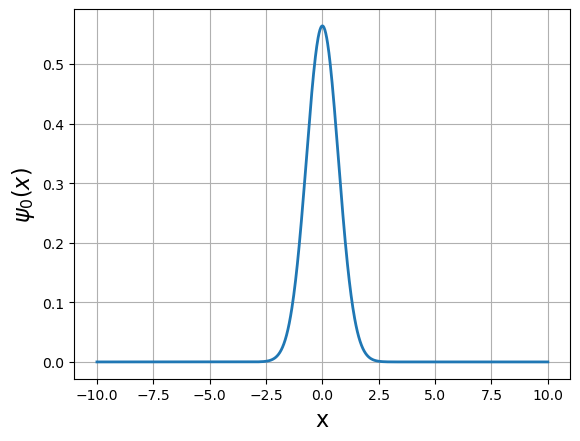

In [4]:
# Processo de integração numérica usando o método dos trapézios

x=np.linspace(-10,10,1000) # Espaçamento

psiquad=psi(0,x)**2

plt.plot(x,psiquad,lw=2) # Lineweight
    
plt.grid('on')  
plt.xlabel('x',fontsize=16)
plt.ylabel('$\psi_0(x)$',fontsize=16)

Integral = trapz(psiquad,x)

print(Integral)

Apenas para fins de representação, será mostrado as soluções gráficas para os outros polinômios.

In [5]:
#Varia a altura da imagem para que não ocorra a sobreposição das ondas
def E(v):
    return (v + 0.5)

# potencial
def V(x):
    return 0.5*x**2


In [6]:
# Quantidade de ondas
VMAX=8 

# Tamanho máximo do intervalo do gráfico
xmin, xmax = -np.sqrt(2*E(VMAX)), np.sqrt(2*E(VMAX))

x = np.linspace(xmin, xmax, 1000)


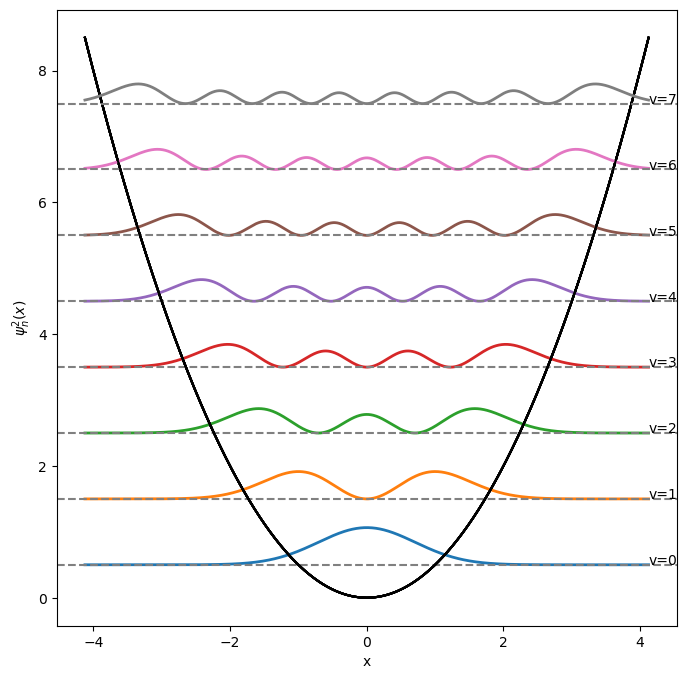

In [7]:
fig, ax = plt.subplots(figsize=(8,8))

for v in range(8):
     
    # plotando a parábola
    ax.plot(x,V(x),color='black')
    # alteração do psi quadrado para que um gráfico não sobreponha outro
    ax.plot(x,psi(v,x)**2 + E(v), lw=2)
    ax.axhline(E(v), color='gray', linestyle='--') 
    ax.text(xmax, 1*E(v), f"v={v}")

    
ax.set_xlabel('x')
ax.set_ylabel('$\psi^2_n(x)$')
fig.savefig('griffiths.png')

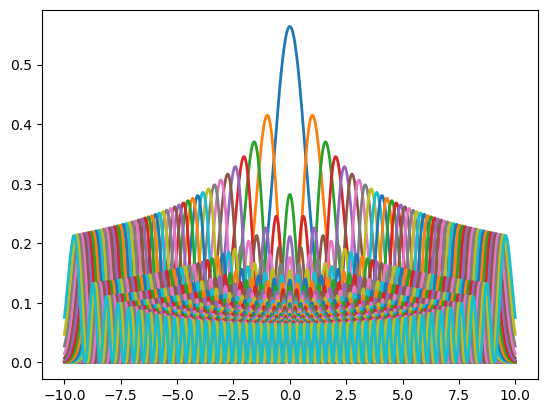

In [8]:
for v in range(50):
    x=np.linspace(-10,10,1000)
    y=psi(v,x)**2
    plt.plot(x,y,lw=2) # Lineweight


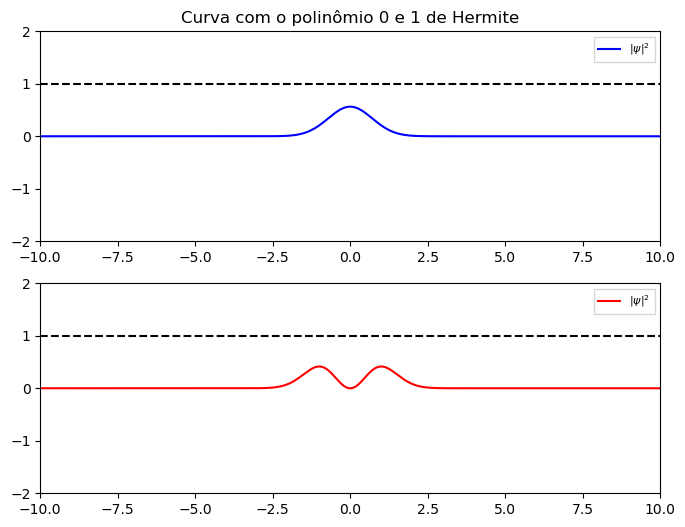

In [9]:
fig = plt.figure(figsize=(8, 6))

# Plotagem da primeira curva
ax1 = plt.subplot(2, 1, 1)
ax1.set_xlim(-10, 10) #Máximo e mínimo em x
ax1.set_ylim(-2, 2) #Máximo e mínimo em y
title = ax1.set_title('Curva com o polinômio 0 e 1 de Hermite')
line11, = ax1.plot([], [], "k--", label=r"") #Valor simbólico, 1
line12, = ax1.plot([], [], "b", label=r"$\vert \psi \vert^2$")
plt.legend(loc=1, fontsize=8, fancybox=False)

# Plotagem da segunda curva
ax2 = plt.subplot(2, 1, 2)
ax2.set_xlim(-10, 10)
ax2.set_ylim(-2, 2)
line21, = ax2.plot([], [], "k--", label=r"")
line22, = ax2.plot([], [], "r", label=r"$\vert \psi \vert^2$")
plt.legend(loc=1, fontsize=8, fancybox=False)


def init():
    x=np.linspace(-10,10,1000)
    line11.set_data(x, 1000 * 0.001)
    line21.set_data(x, 1000 * 0.001)
    return line11, line21


def animate(i):
    x=np.linspace(-10,10,1000)
    line12.set_data(x, psi(0,x)**2)
    line22.set_data(x, psi(1,x)**2)
    return line12, line22


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=30, interval=200)


# .mp4
anim.save('curvas.png', writer='pillow',fps=25,dpi=100)

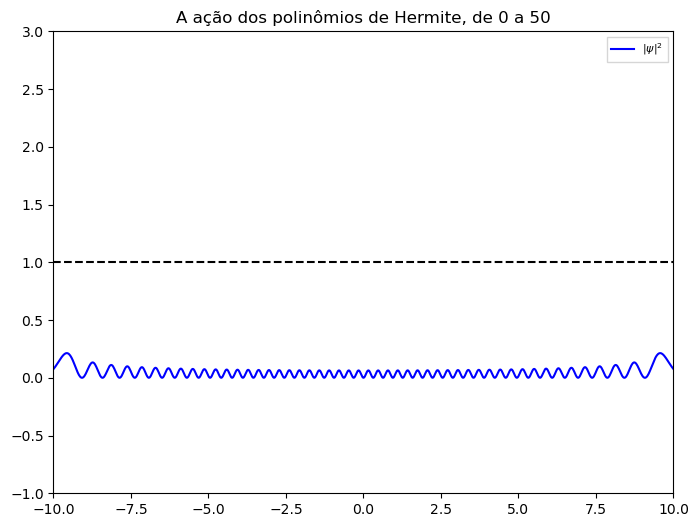

In [10]:
# Animação
fig = plt.figure(figsize=(8, 6))

ax1 = plt.subplot(1, 1, 1)
ax1.set_xlim(-10, 10)
ax1.set_ylim(-1, 3)
title = ax1.set_title('A ação dos polinômios de Hermite, de 0 a 50')
line11, = ax1.plot([], [], "k--", label=r"")
line12, = ax1.plot([], [], "b", label=r"$\vert \psi \vert^2$")
plt.legend(loc=1, fontsize=8, fancybox=False)


def init():
    x=np.linspace(-10,10,1000)
    line11.set_data(x, 1000 * 0.001)
    return line11


def animate(i):
    x=np.linspace(-10,10,1000)
    line12.set_data(x, psi(i,x)**2)
    return line12


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=200)


# .mp4
anim.save('curvas2.gif', writer='pillow',fps=25,dpi=100)

Com os resultados invariantes no tempo, é possível encontrar a resposta para equação de Schrodinger $\Psi(x,0)$ realizando a combinação linear das funções de onda em 0 e em 1 como apresentado acima. Para primeira combinação linear utilizou-se $c_0 = 0.80$ e $c_1 = 0.60$, já que:

$$\sum\limits_{n=1}^{\mbox{oo}}|c_n|²=1$$

Já para a segunda combinação, pensou-se na equação $x²=1-y²$, para que a combinação linear gerada resultasse na proposta abordada pelo somatório.

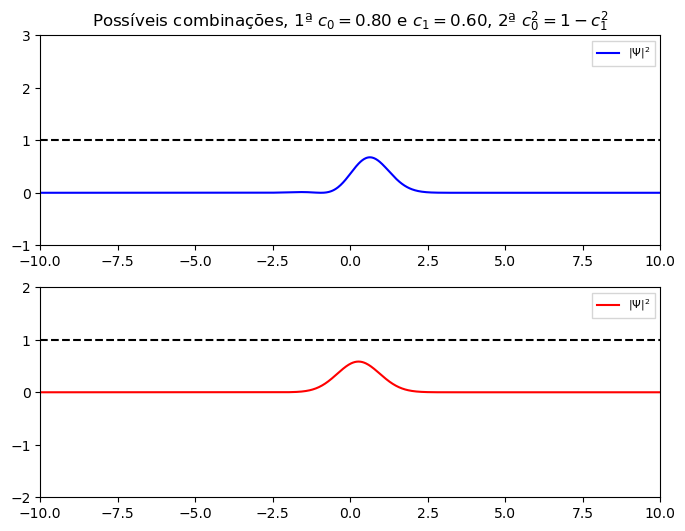

In [11]:
# Animação
fig = plt.figure(figsize=(8, 6))

ax1 = plt.subplot(2, 1, 1)
ax1.set_xlim(-10, 10)
ax1.set_ylim(-1, 3)
title = ax1.set_title('Possíveis combinações, 1ª $c_0=0.80$ e $c_1=0.60$, 2ª $c_0^{2}=1-c_1^{2}$')
line11, = ax1.plot([], [], "k--", label=r"")
line12, = ax1.plot([], [], "b", label=r"$\vert \Psi \vert^2$")
plt.legend(loc=1, fontsize=8, fancybox=False)

ax2 = plt.subplot(2, 1, 2)
ax2.set_xlim(-10, 10)
ax2.set_ylim(-2, 2)
line21, = ax2.plot([], [], "k--", label=r"")
line22, = ax2.plot([], [], "r", label=r"$\vert \Psi \vert^2$")
plt.legend(loc=1, fontsize=8, fancybox=False)


def init():
    x=np.linspace(-10,10,1000)
    line11.set_data(x, 1000 * 0.001)
    line21.set_data(x, 1000 * 0.001)
    return line11, line21


def animate(i):
    x=np.linspace(-10,10,1000)
    line12.set_data(x, (0.80*psi(0,x)+0.60*psi(1,x))**2)
    line22.set_data(x, (((i-1)/100)*psi(0,x)+np.sqrt(1-((i-1)/100)**2)*psi(1,x))**2)
    return line12, line22


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=200)


# .mp4
anim.save('curvas3.gif', writer='pillow',fps=25,dpi=100)

Para concretizar o resultado total da função de onda, devemos integrar a variação em tempo no nosso resultado com a exponencial:

$$e^{-iE_nt/\hbar}=e^{-i(n+1/2)\pi t}$$

tornando a função de onda variante em t, $\psi(x,t)$ e ainda, a solução também variante em t, $\Psi(x,t)$.

In [12]:
# Equação com o adicional da exponencial

def psixt(n, x, t):
    Hn=hermite(n)
    a = complex(0,1)
    Pxt = N(n)*Hn(x)*np.exp(-0.5*x**2)*np.exp(-a*(n+1/2)*t*np.pi)
    return Pxt

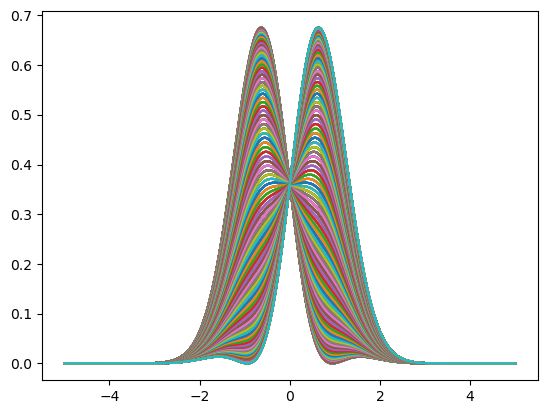

In [13]:
x=np.linspace(-5,5,1000)
psi = np.zeros((1000,1000))
psi_c = [0] * 1000
for i in np.arange(0, 10, 0.01):
    psi = (0.80*psixt(0, x, i)+0.60*psixt(1, x, i))
    r=round((i)*100,1)
    psi_c[int(r)] = np.array(psi).astype(complex)
    plt.plot(x, np.absolute(psi_c[int(r)])**2)


In [14]:
import ipywidgets as widgets
from IPython.display import display

@widgets.interact(v=(0,999))

def plot_psi(v=0):
    plt.plot(x, np.absolute(psi_c[v])**2)

interactive(children=(IntSlider(value=0, description='v', max=999), Output()), _dom_classes=('widget-interact'…

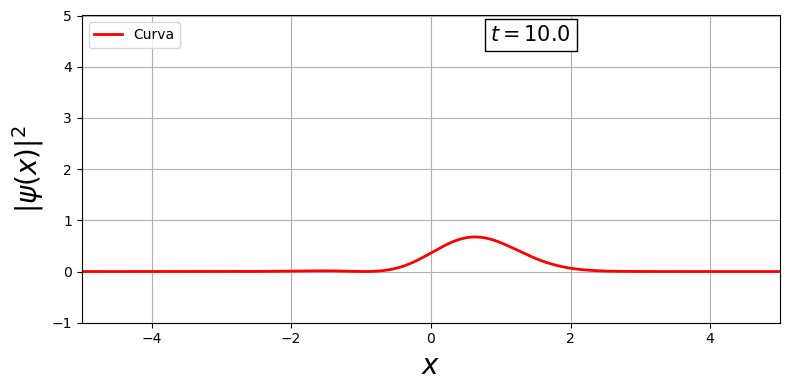

In [15]:
def animate(i):
    ln1.set_data(x, np.absolute(psi_c[i-1])**2)
    time_text.set_text('$t=$'+'{:.1f}'.format(i/100))
    
fig, ax = plt.subplots(1, 1,figsize=(8,4))
ax.grid()
ln1, = plt.plot([], [], 'r-', lw=2, markersize=8, label='Curva')
time_text = ax.text(0.85, 4.5, '', fontsize=15,
           bbox=dict(facecolor='white', edgecolor='black'))
ax.set_ylim(-1, 5)
ax.set_xlim(-5,5)
title = ax.set_title('Resposta analítica')
ax.set_ylabel('$|\psi(x)|^2$', fontsize=20)
ax.set_xlabel('$x$', fontsize=20)
ax.legend(loc='upper left')
ax.set_title('')
plt.tight_layout()
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=200)
ani.save('analiticalAnswer.gif',writer='pillow',fps=50,dpi=100)

Ao invés de usar a resposta analítica podemos aproximar as as derivadas parciais utilizadas na equação de Schrödinger a partir de diferenças finitas. Particularmente, para esse projeto utilizaremos o método de Crank-Nicolson para aproximação. A sua demonstração bem como a formatação das variáveis utilizadas está no documento demonstracao.pdf disposto no github https://github.com/GabrielSiqueira1/MPC-Quantum-Computing

In [16]:
# Bilbiotecas para auxílio na programação matemática
import math, sys 
import numpy as np
import sympy as sp

from scipy import sparse # Produção das diagonais das matrizes
from scipy.sparse import diags 

# Plotagem 2D e 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


from os import path # Suficiente para manipulação de arquivos

# Para solução exata
from scipy.special import hermite
from math import factorial

%matplotlib inline
count = 0

In [17]:
def N(n):
    return 1*1./np.sqrt(np.sqrt(np.pi)*2**n*factorial(n))

def psi(n, x):
    Hn=hermite(n)
    Px = N(n)*Hn(x)*np.exp(-0.5*x**2)
    return Px

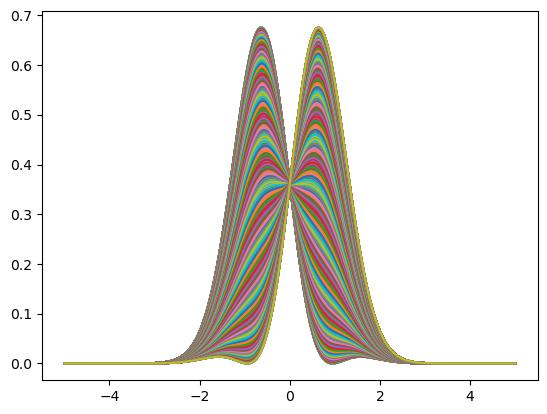

In [18]:
'''
Método de Crank-Nicolson para a solução da equação de Schrödinger em uma única dimensão
    ih * u_t = h_2/2m * u_xx + Vu

Com as condições de contorno não incluídas nessa etapa para que o controle preditivo faça as alterações
Com a equação inicial sendo decidida pelos polinômios de hermite de primeiro e segundo grau

u(x,0) = 0.80 * psi(0, x) + 0.60 * psi(1,x)

A interpretação foi ajustada a partir do código em python da Msc. Mirian Silva
'''

def CrankNicolson(M, O = 0, L = 1, T = 0.5):
    N = 1000 #São os pontos no intervalo de tempo
    
    #Pensando no poço quadrado infinito, temos essas duas limitações, onde L varia
    x0, xL = O, L

    P = 3.141111111111111111111111111
    #Discretização espacial
    dx = (xL - x0)/(P*M-1) 

    #Discretização temporal
    t0, tF = 0, T
    dt = (tF - t0)/(P*N-1)

    #Retorno dos números em um intervalo
    xs = np.linspace(x0, xL, M)
    ts = np.linspace(t0, tF, N)

    #Suponha um oscilador harmônico simples
    hbar = 1
    m = 1
    w = np.pi
    V = 1/2*m*w**2*xs**2

    #A partir da demonstração
    a = hbar/(4*m*dx**2) 
    b = 1j*hbar/dt - 2*a - 1/2*V
    c = 1j*hbar/dt + 2*a + 1/2*V

    #Obtenção da matriz
    ##Diagonais principais
    diagPrincipalA = b*np.ones((1,M)) #Cria uma matriz de 1's
    diagPrincipalB = c*np.ones((1,M))

    ##Diagonais secundárias, tem um tamanho a menos
    diagSecundariaA = a*np.ones((1,M-1))
    diagSecundariaB = (-a)*np.ones((1,M-1))

    diagonaisA = [diagPrincipalA, diagSecundariaA, diagSecundariaA]
    matrizA = sparse.diags(diagonaisA, [0, -1, 1], shape=(M,M)).toarray()
    
    diagonaisB = [diagPrincipalB, diagSecundariaB, diagSecundariaB]         
    matrizB = sparse.diags(diagonaisB, [0, -1, 1], shape=(M,M)).toarray()
    
    #Obtenção da matriz psi (Ela acumulará para o psi futuro)
    ps = np.zeros((M, N))
    psi_c = np.zeros((M, N))

    #Condição inicial
    ps[:,0] = 0.80 * psi(0, xs) + 0.60 * psi(1,xs) #A primeira coluna da matriz terá a equação inicial, em todas as posições
    psi_c = ps.astype(complex)
    #For para o acúmulo de resultados
    for k in range(1,N):
        b = np.matmul(matrizB, np.array(psi_c[0:M, k-1])) #Multiplicação de arrays já que houve uma conversão anterior
        psi_c[0:M, k] = np.linalg.solve(matrizA, b) #Matlab: x = A\b
        plt.plot(xs, np.absolute(psi_c[0:M, k])**2)
    return (psi_c, ts, xs)

psi, ts, xs = CrankNicolson(M = 1000, O = -5, L = 5, T = 10)

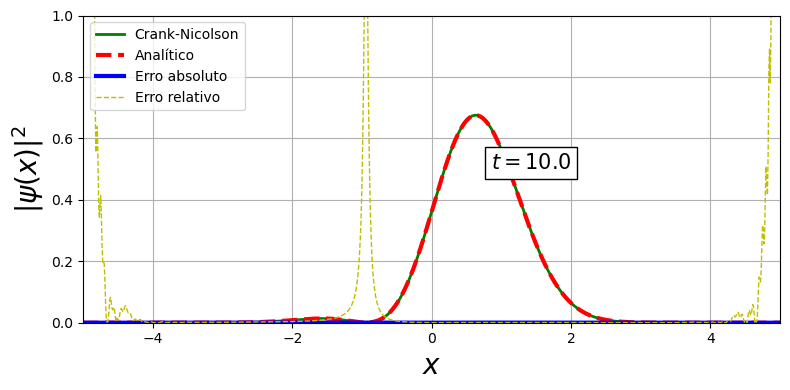

In [19]:
from matplotlib import animation
from matplotlib.animation import PillowWriter

def animate(i):
    ln1.set_data(xs, np.absolute(psi[0:1000, i-1])**2)
    time_text.set_text('$t=$'+'{:.1f}'.format(i/100))
    ln2.set_data(xs, np.absolute(psi_c[i-1])**2)
    ln3.set_data(xs, np.absolute(np.absolute(psi[0:1000, i-1])**2-np.absolute(psi_c[i-1])**2))
    ln4.set_data(xs, np.absolute(np.absolute(psi[0:1000, i-1])**2-np.absolute(psi_c[i-1])**2)/np.absolute(psi[0:1000, i-1])**2)
       
    
fig, ax = plt.subplots(1,1, figsize=(8,4))
ax.grid()
ln1, = plt.plot([], [], 'g-', lw=2, markersize=8, label='Crank-Nicolson')
ln2, = plt.plot([], [], 'r--', lw=3, markersize=8, label='Analítico')
ln3, = plt.plot([], [], 'b-', lw=3, markersize=8, label='Erro absoluto')
ln4, = plt.plot([], [], 'y--', lw=1, markersize=8, label='Erro relativo')


time_text = ax.text(0.85, 0.5, '', fontsize=15,
           bbox=dict(facecolor='white', edgecolor='black'))
ax.set_ylim(0, 1)
ax.set_xlim(-5,5)
ax.set_ylabel('$|\psi(x)|^2$', fontsize=20)
ax.set_xlabel('$x$', fontsize=20)
ax.legend(loc='upper left')
ax.set_title('')
plt.tight_layout()
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=200)
ani.save('comparative.gif',writer='pillow',fps=50,dpi=100)

Para aferir a qualidade da aproximação por Crank-Nicolson, se faz necessário utilizar das operações de erro absoluto e relativo visto em disciplinas como a estatística.

Erro absoluto: $\Delta Erro Absoluto = \psi_{exato} - \psi_{CN}$
Erro relativo: $\Delta Erro Relativo = \frac{\psi_{exato} - \psi_{CN}}{\psi_{exato}}$

É possível realizar essa operação já que o $\psi$ para o exato e para Crank-Nicolson tem a mesma dimensão.

In [20]:
def ExactSolution(M, T = 1000, L = 5):
    N = 1000

    xs = np.linspace(-5, L, M)
    ts = np.linspace(0, N/100, T)
    
    psiExato = np.zeros((M, N)).astype(complex)
    r=0
    for i in np.arange(-5, 5, 0.01):
        for j in np.arange(0, 10, 0.01):
            psiExato[r][int(round(j*100,1))] = 0.80*psixt(0,i,j)+0.60*psixt(1,i,j)
        r+=1
    
    return (psiExato, ts, xs)

def surfaceplot(psi, psiExato, ts, xs, M): 
    N = M
    #meshgrid : Retorna uma grade 2-D a partir dos vetores ts e xs que delimitam espaço e tempo
    X, T = np.meshgrid(ts, xs)
    
    fig = plt.figure(figsize=plt.figaspect(0.3))
    
    # ---- Solução exata ----
    ax = fig.add_subplot(1, 4, 1,projection='3d')
    surf = ax.plot_surface(X, T, psiExato, linewidth=0, cmap=cm.jet, antialiased=True)
    ax.set_title('Solução exata')
    ax.set_xlabel('Tempo')
    ax.set_ylabel('Espaço')
    ax.set_zlabel('$|\Psi^{2}|$')
    
    # ---- Resultado com Crank-Nicolson ----
    ax1 = fig.add_subplot(1, 4, 2,projection='3d')
    surf = ax1.plot_surface(X, T, psi, linewidth=0, cmap=cm.jet, antialiased=True)
    ax1.set_title('Aproximação')
    ax1.set_xlabel('Tempo')
    ax1.set_ylabel('Espaço')
    ax1.set_zlabel('$|\Psi^{2}|$')
    
    
    # ---- Erro absoluto ----
    ax2 = fig.add_subplot(1, 4, 3, projection='3d')
    surf2 = ax2.plot_surface(X, T, abs(psiExato-psi), linewidth=0, cmap=cm.jet, antialiased=True)
    ax2.set_title('Erro absoluto')
    ax2.set_xlabel('Tempo')
    ax2.set_ylabel('Espaço')
    ax2.set_zlabel('Erro')
    
    # ---- Erro relativo ---- 
    psiRelativo = np.zeros((M, N)).astype(complex)

    for i in range(0, M):
        for j in range(0, N):
              psiRelativo[i][j] = abs((psiExato[i][j] - psi[i][j])/psiExato[i][j])
    
          
    ax3 = fig.add_subplot(1, 4, 4, projection='3d')
    surf3 = ax3.plot_surface(X, T, psiRelativo, linewidth=0, cmap=cm.jet, antialiased=True)
    ax3.set_title('Erro relativo')
    ax3.set_xlabel('Tempo')
    ax3.set_ylabel('Espaço')
    ax3.set_zlabel('Erro')
    
    plt.tight_layout()
    ax.view_init(30,230)
    ax1.view_init(30,230)
    ax2.view_init(30,230)
    ax3.view_init(30,230)
    
    fig.savefig(path.join("errors.png".format(count)),dpi=600)
    plt.draw()

C:\Users\gabri\miniconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


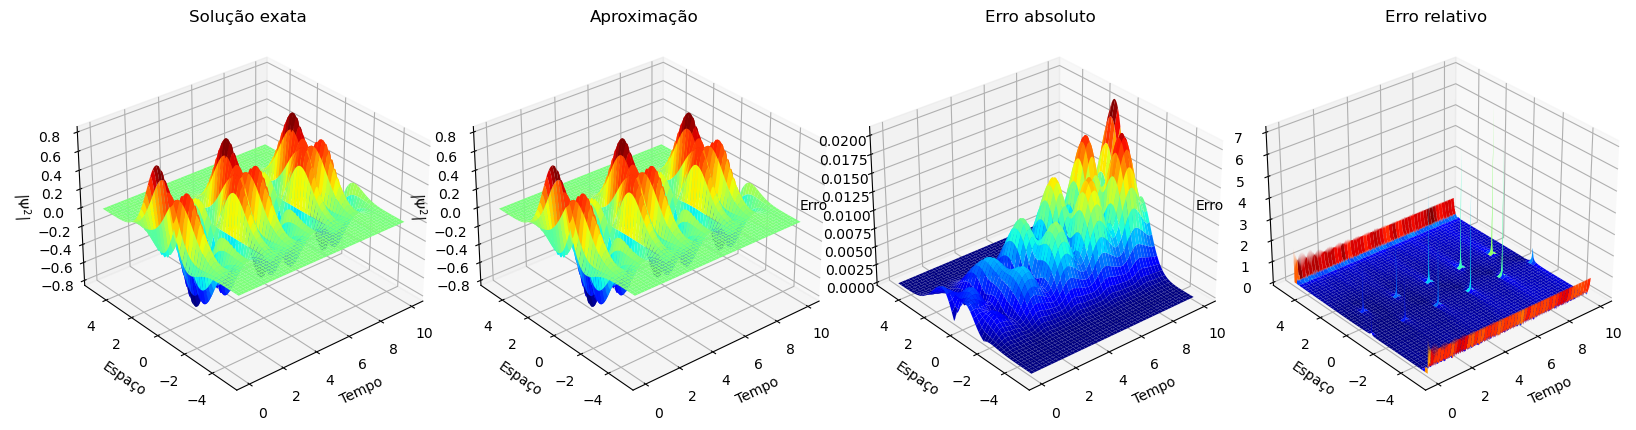

In [21]:
psiExato, x, t = ExactSolution(M = 1000)
surfaceplot(psi, psiExato, ts, xs, M = 1000)